# Authors

**Shehab Moharram** - shehab.moharram@tu-dortmund.de  
**Mohamed Elgabry** - mohamed.elgabry@tu-dortmund.de

*Master's students, TU Dortmund University*

---

# Chinook Explorer: Complete Data Analysis Tutorial

Welcome to the **Chinook Explorer** project tutorial! This notebook demonstrates a complete end-to-end data analysis workflow using the Chinook music store database.

## 🎯 Project Overview

The **Chinook Explorer** is a Python package designed to analyze music store data, providing insights into:
- Sales trends and revenue patterns
- Customer behavior and segmentation
- Product performance (artists, genres, tracks)
- Business intelligence metrics

## 🗂️ Package Components

Our `chinook_explorer` package includes four main modules:
- **`io.py`** - Data loading and validation (`ChinookLoader`)
- **`modeling.py`** - Data modeling and table joins (`ChinookModel`)
- **`analytics.py`** - Business intelligence analysis (`ChinookAnalyzer`)
- **`viz.py`** - Data visualization (`ChinookVisualizer`)

## 📋 Tutorial Structure

1. **Environment Setup & Data Loading** - Import packages and load CSV data
2. **Data Modeling** - Build analysis-ready tables with proper relationships
3. **Business Analytics** - Generate KPIs and insights
4. **Data Visualization** - Create compelling charts and plots
5. **Customer Segmentation** - RFM analysis and customer insights
6. **Summary & Conclusions** - Key findings and recommendations

Let's begin our analysis journey!

In [44]:
# Import required libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Configure matplotlib for inline plotting
%matplotlib inline

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("✅ Environment setup complete!")
print(f"Python version: {sys.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

✅ Environment setup complete!
Python version: 3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]
Pandas version: 2.3.2
Matplotlib version: 3.10.6
Seaborn version: 0.13.2


## 1. 📂 Data Loading with ChinookLoader

The first step is to load and validate our Chinook database CSV files. Our `ChinookLoader` class handles:
- Loading all CSV files from the data directory
- Automatic data type detection and conversion
- Schema validation and relationship checking
- Summary statistics generation

In [45]:
# Import our custom modules
from chinook_explorer.io import ChinookLoader

# Initialize the data loader (data directory is relative to notebook location)
loader = ChinookLoader(data_dir="../data")
print("🔄 Loading Chinook database CSV files...")

# Load all CSV tables
tables = loader.load_tables()
print(f"\n✅ Successfully loaded {len(tables)} tables!")

# Display summary information
print("\n📊 Dataset Summary:")
summary = loader.summary()
display(summary)

# Validate data schema and relationships
print("\n🔍 Validating data schema...")
validation_result = loader.validate_schema()

# Check if validation returned issues (could be DataFrame or dict)
if isinstance(validation_result, pd.DataFrame) and not validation_result.empty:
    if 'status' in validation_result.columns and validation_result['status'].iloc[0] != "No major schema issues detected.":
        print("⚠️ Schema validation results:")
        display(validation_result)
    else:
        print("✅ All schema validations passed!")
elif isinstance(validation_result, dict) and validation_result:
    print("⚠️ Validation issues found:")
    for table_name, issues in validation_result.items():
        print(f"\n{table_name}:")
        for issue in issues:
            print(f"  - {issue}")
else:
    print("✅ All schema validations passed!")

# Calculate total rows
total_rows = summary['rows'].sum()
print(f"\n📈 Dataset Statistics:")
print(f"   • Total Rows: {total_rows:,}")
print(f"   • Total Tables: {len(summary)}")
print(f"   • Missing Values: {summary['missing_values'].sum():,}")

🔄 Loading Chinook database CSV files...

✅ Successfully loaded 11 tables!

📊 Dataset Summary:


,table,rows,columns,missing_values
0,album,347,3,0
1,artist,275,2,0
2,customer,59,13,130
3,employee,8,15,1
4,genre,25,2,0
5,invoice,412,9,230
6,invoiceline,2240,5,0
7,mediatype,5,2,0
8,playlist,18,2,0
9,playlisttrack,8715,2,0



🔍 Validating data schema...
✅ All schema validations passed!

📈 Dataset Statistics:
   • Total Rows: 15,607
   • Total Tables: 11
   • Missing Values: 1,339


## 2. 🔧 Data Modeling with ChinookModel

Now we'll use the `ChinookModel` class to build analysis-ready DataFrames by joining related tables and adding calculated fields. This creates denormalized tables optimized for analytics.

In [46]:
# Import modeling module
from chinook_explorer.modeling import ChinookModel

# Create model instance with loaded tables
model = ChinookModel(tables)
print("🔧 Building analysis-ready data models...")

# 1. Build sales line items fact table
sales_data = model.sales_line_items()
print(f"\n💰 Sales Line Items: {sales_data.shape[0]:,} rows × {sales_data.shape[1]} columns")
print("   Includes: invoices, customers, tracks, albums, artists, genres")

# 2. Build catalog dimension table  
catalog_data = model.catalog()
print(f"\n🎵 Music Catalog: {catalog_data.shape[0]:,} tracks × {catalog_data.shape[1]} columns")
print("   Includes: tracks with all metadata and duration in minutes")

# 3. Build customer dimension table
customer_data = model.customers_dim()
print(f"\n👥 Customer Dimension: {customer_data.shape[0]:,} customers × {customer_data.shape[1]} columns")
print("   Includes: demographics and support representative info")

# Display sample of sales data with correct column names
print(f"\n📋 Sample Sales Data:")
display(sales_data[['InvoiceDate', 'FirstName', 'LastName', 'Name', 
                   'Name_artist', 'Name_genre', 'UnitPrice', 'Quantity', 
                   'LineTotal']].head())

# Verify data integrity
assert sales_data['LineTotal'].sum() > 0, "Sales data should have positive revenue"
assert len(catalog_data) > 0, "Catalog should not be empty"
assert len(customer_data) > 0, "Customer data should not be empty"

print("\n✅ All data models built successfully!")

🔧 Building analysis-ready data models...

💰 Sales Line Items: 2,240 rows × 25 columns
   Includes: invoices, customers, tracks, albums, artists, genres

🎵 Music Catalog: 3,503 tracks × 15 columns
   Includes: tracks with all metadata and duration in minutes

👥 Customer Dimension: 59 customers × 28 columns
   Includes: demographics and support representative info

📋 Sample Sales Data:

🎵 Music Catalog: 3,503 tracks × 15 columns
   Includes: tracks with all metadata and duration in minutes

👥 Customer Dimension: 59 customers × 28 columns
   Includes: demographics and support representative info

📋 Sample Sales Data:


,InvoiceDate,FirstName,LastName,Name,Name_artist,Name_genre,UnitPrice,Quantity,LineTotal
0,2009-01-01,Leonie,Köhler,Balls to the Wall,Accept,Rock,0.99,1,0.99
1,2009-01-01,Leonie,Köhler,Restless and Wild,Accept,Rock,0.99,1,0.99
2,2009-01-02,Bjørn,Hansen,Put The Finger On You,AC/DC,Rock,0.99,1,0.99
3,2009-01-02,Bjørn,Hansen,Inject The Venom,AC/DC,Rock,0.99,1,0.99
4,2009-01-02,Bjørn,Hansen,Evil Walks,AC/DC,Rock,0.99,1,0.99



✅ All data models built successfully!


## 3. 📊 Business Analytics with ChinookAnalyzer

The `ChinookAnalyzer` class provides comprehensive business intelligence methods. Let's explore revenue trends, top performers, and customer insights.

In [47]:
# Import analytics module
from chinook_explorer.analytics import ChinookAnalyzer

# Create analyzer instance with our prepared data
analyzer = ChinookAnalyzer(sales_data, catalog_data)
print("📈 Initializing business analytics engine...")

# 1. Revenue Trends Analysis
print("\n📅 Monthly Revenue Trends:")
monthly_revenue = analyzer.revenue_by_month()
display(monthly_revenue.head(10))

print(f"💰 Total Revenue: ${monthly_revenue['Revenue'].sum():,.2f}")
print(f"📊 Date Range: {monthly_revenue['Month'].min().strftime('%Y-%m')} to {monthly_revenue['Month'].max().strftime('%Y-%m')}")

# 2. Top Countries by Revenue
print("\n🌍 Top Countries by Revenue:")
top_countries = analyzer.top_countries_by_revenue(n=10)
display(top_countries)

# 3. Top Genres by Revenue  
print("\n🎵 Top Genres by Revenue:")
top_genres = analyzer.top_genres_by_revenue(n=8)
display(top_genres)

# 4. Top Artists by Revenue
print("\n⭐ Top Artists by Revenue:")
top_artists = analyzer.top_artists_by_revenue(n=10)
display(top_artists)

📈 Initializing business analytics engine...

📅 Monthly Revenue Trends:


,Month,Revenue
0,2009-01-01,35.64
1,2009-02-01,37.62
2,2009-03-01,37.62
3,2009-04-01,37.62
4,2009-05-01,37.62
5,2009-06-01,37.62
6,2009-07-01,37.62
7,2009-08-01,37.62
8,2009-09-01,37.62
9,2009-10-01,37.62


💰 Total Revenue: $2,328.60
📊 Date Range: 2009-01 to 2013-12

🌍 Top Countries by Revenue:


,Country,Revenue
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62



🎵 Top Genres by Revenue:


,Name_genre,Revenue
0,Rock,826.65
1,Latin,382.14
2,Metal,261.36
3,Alternative & Punk,241.56
4,TV Shows,93.53
5,Jazz,79.20
6,Blues,60.39
7,Drama,57.71



⭐ Top Artists by Revenue:


,Name_artist,Revenue
0,Iron Maiden,138.60
1,U2,105.93
2,Metallica,90.09
3,Led Zeppelin,86.13
4,Lost,81.59
5,The Office,49.75
6,Os Paralamas Do Sucesso,44.55
7,Deep Purple,43.56
8,Faith No More,41.58
9,Eric Clapton,39.60


### 3.1 Customer Analytics & Segmentation

Let's dive deeper into customer behavior with lifetime value analysis and RFM segmentation (Recency, Frequency, Monetary).

In [48]:
# Customer Lifetime Value Analysis
print("💎 Customer Lifetime Value Analysis:")
clv_data = analyzer.customer_lifetime_value(n=15)
display(clv_data)

print(f"🏆 Top Customer Revenue: ${clv_data['TotalRevenue'].iloc[0]:.2f}")
print(f"📊 Average CLV: ${clv_data['TotalRevenue'].mean():.2f}")

# RFM Analysis - Advanced Customer Segmentation
print("\n🎯 RFM Analysis (Recency, Frequency, Monetary):")
rfm_data = analyzer.rfm_analysis()
display(rfm_data.head(10))

# RFM Score Distribution
print("\n📈 RFM Score Distribution:")
rfm_summary = rfm_data.groupby('RFM_Score').agg({
    'CustomerId': 'count',
    'Monetary': ['mean', 'sum']
}).round(2)
rfm_summary.columns = ['Customer_Count', 'Avg_Revenue', 'Total_Revenue']
display(rfm_summary.head(10))

print(f"💯 Highest RFM Score: {rfm_data['RFM_Score'].max()}")
print(f"📊 Average RFM Score: {rfm_data['RFM_Score'].mean():.1f}")

💎 Customer Lifetime Value Analysis:


,CustomerId,FirstName,LastName,TotalRevenue
0,6,Helena,Holý,49.62
1,26,Richard,Cunningham,47.62
2,57,Luis,Rojas,46.62
3,45,Ladislav,Kovács,45.62
4,46,Hugh,O'Reilly,45.62
5,28,Julia,Barnett,43.62
6,37,Fynn,Zimmermann,43.62
7,24,Frank,Ralston,43.62
8,7,Astrid,Gruber,42.62
9,25,Victor,Stevens,42.62


🏆 Top Customer Revenue: $49.62
📊 Average CLV: $43.62

🎯 RFM Analysis (Recency, Frequency, Monetary):


,CustomerId,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
5,6,40,7,49.62,5,1,4,10
24,25,18,7,42.62,5,1,4,10
45,46,49,7,45.62,5,1,4,10
43,44,9,7,41.62,5,1,4,10
19,20,32,7,39.62,5,1,3,9
23,24,125,7,43.62,4,1,4,9
6,7,187,7,42.62,3,1,4,8
36,37,203,7,43.62,3,1,4,8
41,42,50,7,39.62,4,1,3,8
3,4,81,7,39.62,4,1,3,8



📈 RFM Score Distribution:


,Customer_Count,Avg_Revenue,Total_Revenue
RFM_Score,,,
3,6,37.46,224.74
4,11,37.89,416.82
5,8,38.24,305.96
6,8,39.12,312.96
7,12,39.62,475.44
8,8,41.24,329.96
9,2,41.62,83.24
10,4,44.87,179.48


💯 Highest RFM Score: 10
📊 Average RFM Score: 6.0


### 3.2 Text Analytics & Music Insights

Explore track naming patterns and duration statistics to understand music catalog characteristics.

In [49]:
# Text Analysis - Most Common Words in Track Titles
print("🔤 Most Common Words in Track Titles:")
common_words = analyzer.top_words_in_track_titles(n=15)
display(common_words)

# Music Duration Analysis
print("\n⏱️ Track Duration Statistics:")
duration_stats = analyzer.duration_stats()
print(duration_stats)

# Additional duration insights
avg_duration = duration_stats['mean']
max_duration = duration_stats['max']
min_duration = duration_stats['min']

print(f"\n🎵 Average track length: {avg_duration:.1f} minutes ({avg_duration*60:.0f} seconds)")
print(f"📏 Longest track: {max_duration:.1f} minutes ({max_duration*60:.0f} seconds)")
print(f"📏 Shortest track: {min_duration:.1f} minutes ({min_duration*60:.0f} seconds)")

# Count tracks by duration ranges
duration_ranges = pd.cut(catalog_data['DurationMin'], 
                        bins=[0, 2, 4, 6, 10, float('inf')], 
                        labels=['Very Short (0-2min)', 'Short (2-4min)', 
                               'Medium (4-6min)', 'Long (6-10min)', 'Very Long (10min+)'])
duration_distribution = duration_ranges.value_counts().reset_index()
duration_distribution.columns = ['Duration_Range', 'Track_Count']

print(f"\n📊 Track Duration Distribution:")
display(duration_distribution)

🔤 Most Common Words in Track Titles:


,Word,Frequency
0,you,129
1,i,111
2,love,103
3,me,88
4,no,84
5,do,71
6,de,70
7,my,68
8,o,49
9,it,48



⏱️ Track Duration Statistics:
count    3503.000000
mean        6.559987
std         8.916757
min         0.017850
25%         3.454683
50%         4.260567
75%         5.360750
max        88.115883
Name: DurationMin, dtype: float64

🎵 Average track length: 6.6 minutes (394 seconds)
📏 Longest track: 88.1 minutes (5287 seconds)
📏 Shortest track: 0.0 minutes (1 seconds)

📊 Track Duration Distribution:


,Duration_Range,Track_Count
0,Medium (4-6min),1418
1,Short (2-4min),1368
2,Long (6-10min),363
3,Very Long (10min+),260
4,Very Short (0-2min),94


## 4. 📈 Data Visualization with ChinookVisualizer

Now let's create compelling visualizations to better understand our data patterns. Our `ChinookVisualizer` class provides ready-to-use plotting functions.

🎨 Creating data visualizations...

📈 Creating monthly revenue trend visualization...


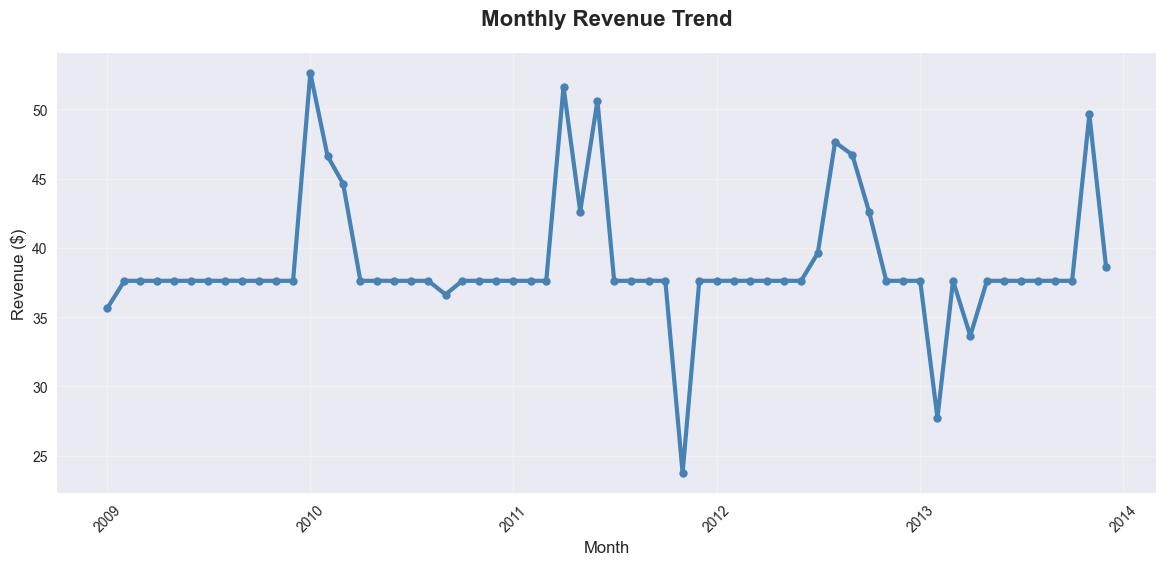


🌍 Creating top countries revenue chart...


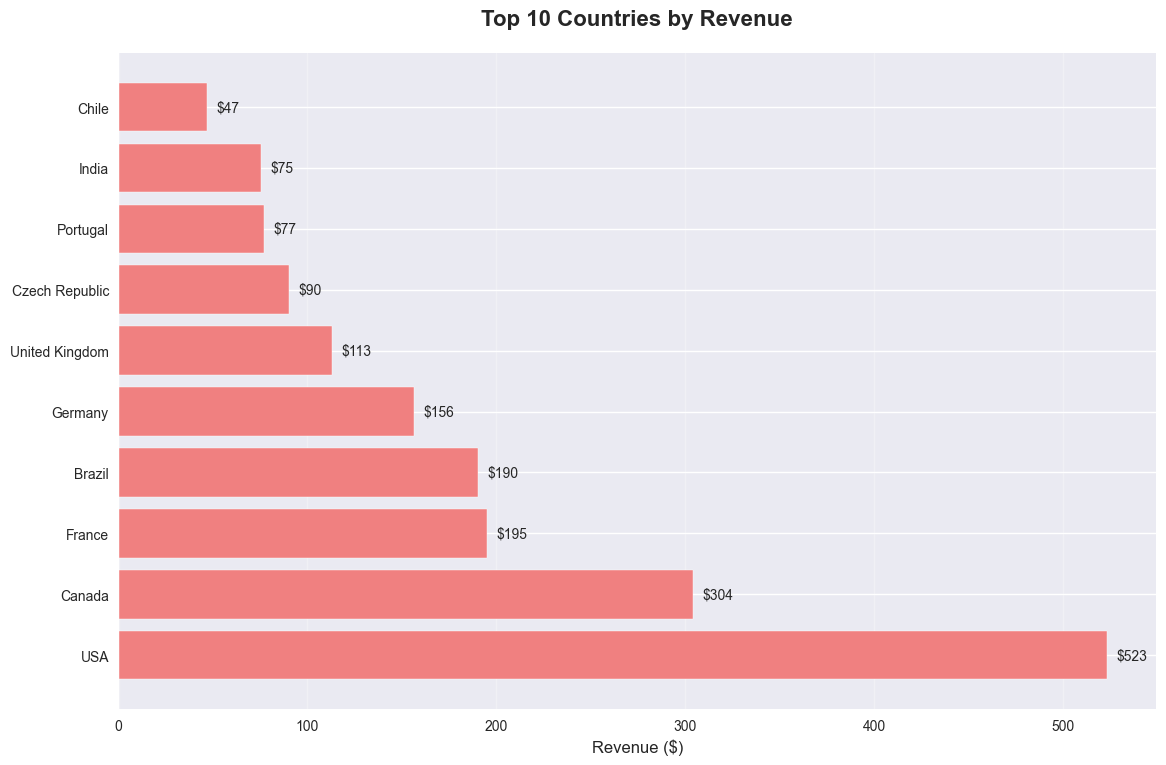


🎵 Creating genre performance chart...


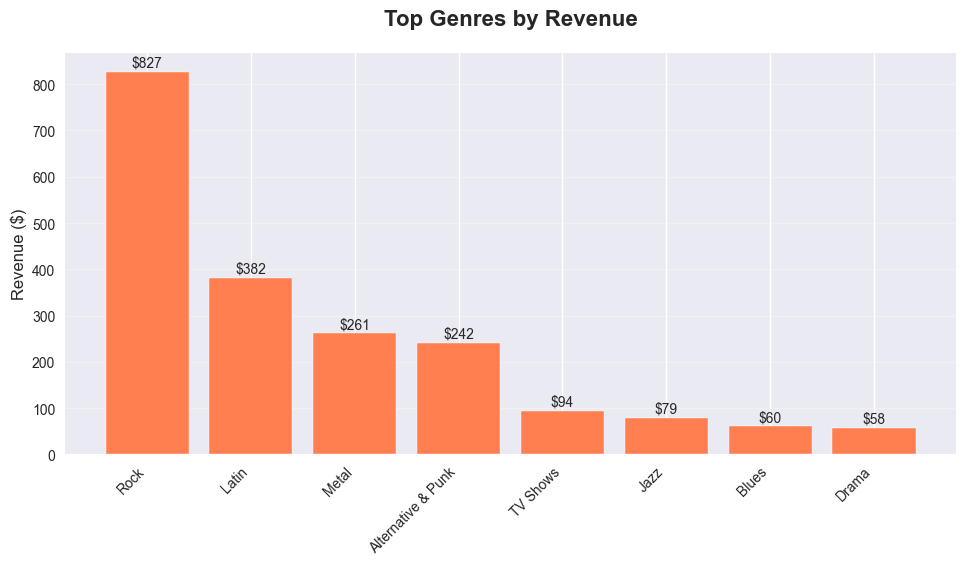

In [50]:
# Create visualizations using matplotlib and seaborn
print("🎨 Creating data visualizations...")

# Set up the figure style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. Monthly Revenue Trend
print("\n📈 Creating monthly revenue trend visualization...")
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_revenue['Month'], monthly_revenue['Revenue'], 
        marker='o', linewidth=3, markersize=6, color='steelblue')
ax.set_title('Monthly Revenue Trend', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Revenue ($)', fontsize=12)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Top Countries Revenue Bar Chart
print("\n🌍 Creating top countries revenue chart...")
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(range(len(top_countries)), top_countries['Revenue'], color='lightcoral')
ax.set_yticks(range(len(top_countries)))
ax.set_yticklabels(top_countries['Country'])
ax.set_title('Top 10 Countries by Revenue', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Revenue ($)', fontsize=12)
ax.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 5, bar.get_y() + bar.get_height()/2, 
            f'${width:.0f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# 3. Genre Performance
print("\n🎵 Creating genre performance chart...")
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(range(len(top_genres)), top_genres['Revenue'], color='coral')
ax.set_xticks(range(len(top_genres)))
ax.set_xticklabels(top_genres['Name_genre'], rotation=45, ha='right')
ax.set_title('Top Genres by Revenue', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Revenue ($)', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5,
            f'${height:.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


💎 Creating customer lifetime value distribution...


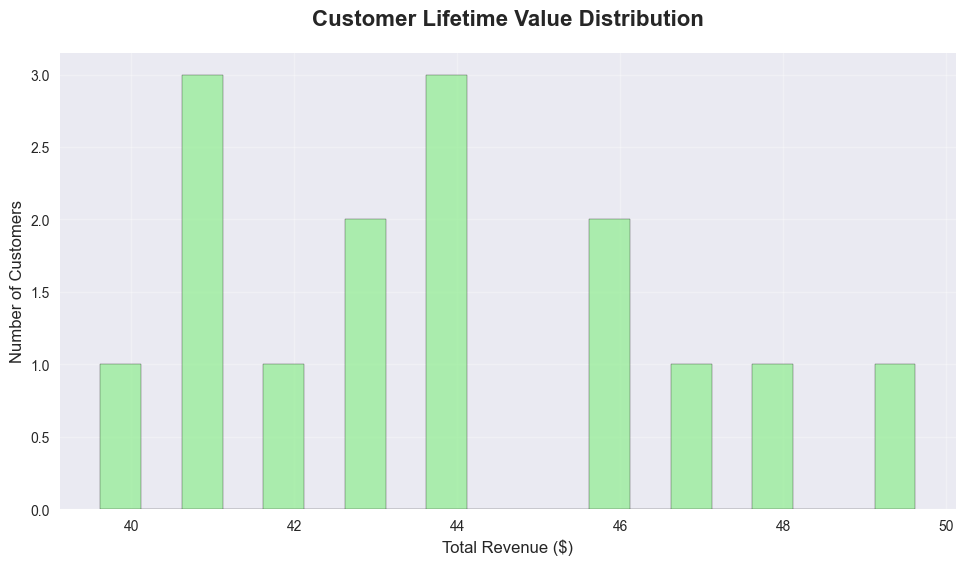


🎯 Creating RFM score distribution...


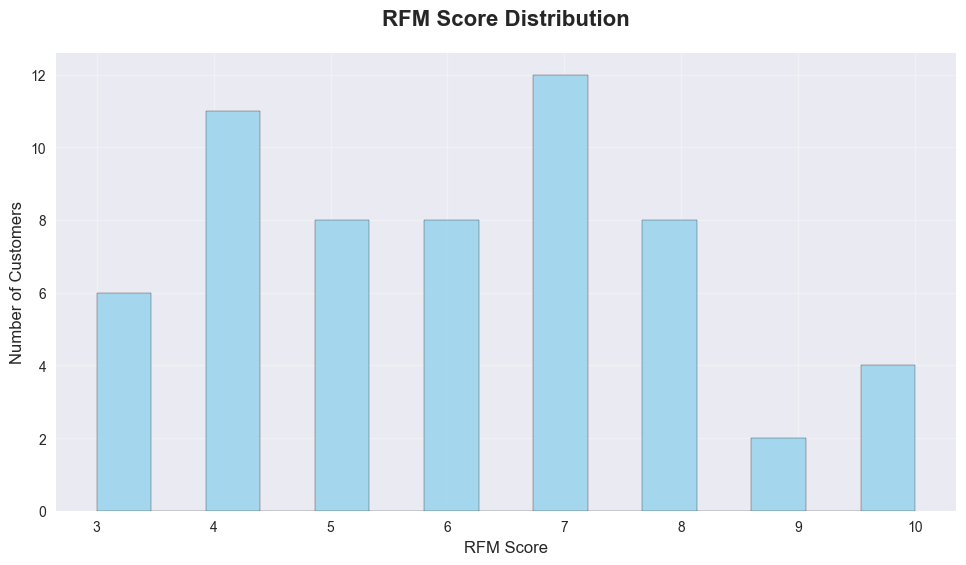


🔤 Creating word frequency visualization...


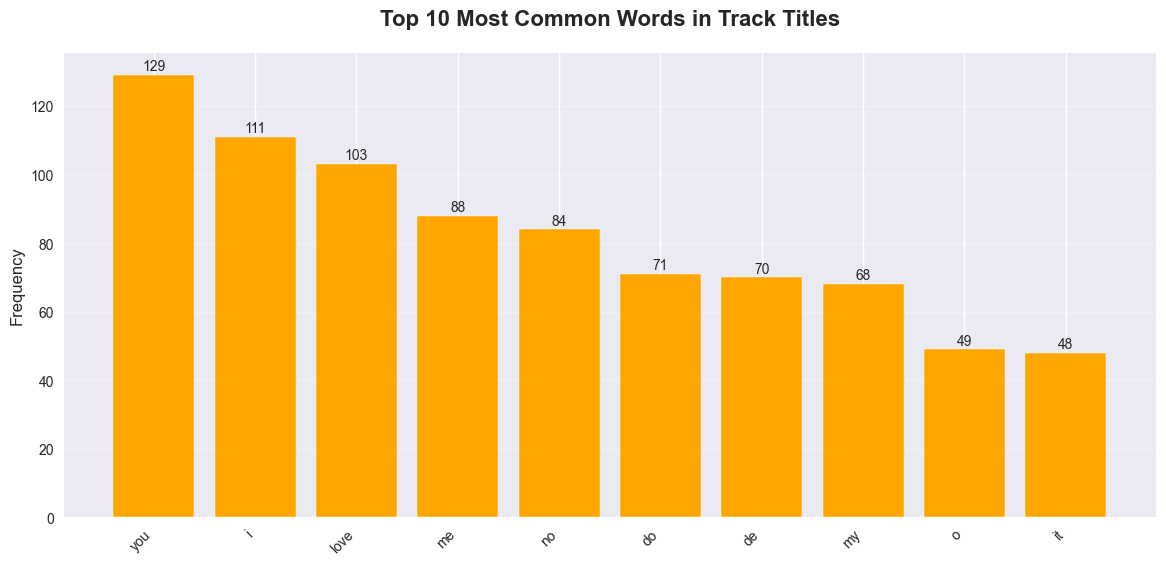


⏱️ Creating track duration distribution...


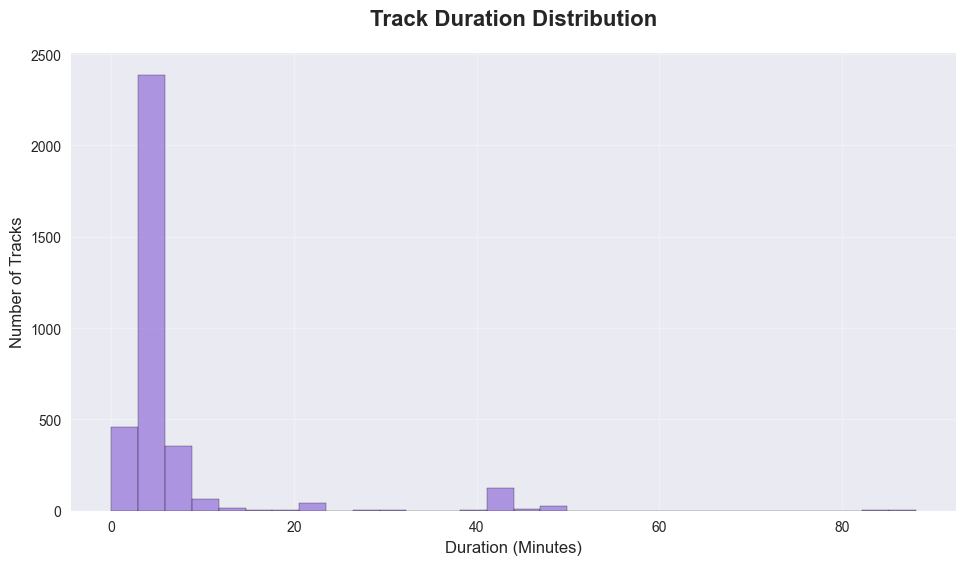


✅ All visualizations completed successfully!


In [51]:
# 4. Customer Lifetime Value Distribution
print("\n💎 Creating customer lifetime value distribution...")
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(clv_data['TotalRevenue'], bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
ax.set_title('Customer Lifetime Value Distribution', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Total Revenue ($)', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. RFM Score Distribution
print("\n🎯 Creating RFM score distribution...")
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(rfm_data['RFM_Score'], bins=15, color='skyblue', alpha=0.7, edgecolor='black')
ax.set_title('RFM Score Distribution', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('RFM Score', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Word Frequency Chart
print("\n🔤 Creating word frequency visualization...")
fig, ax = plt.subplots(figsize=(12, 6))
top_10_words = common_words.head(10)
bars = ax.bar(range(len(top_10_words)), top_10_words['Frequency'], color='orange')
ax.set_xticks(range(len(top_10_words)))
ax.set_xticklabels(top_10_words['Word'], rotation=45, ha='right')
ax.set_title('Top 10 Most Common Words in Track Titles', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 7. Duration Distribution Histogram
print("\n⏱️ Creating track duration distribution...")
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(catalog_data['DurationMin'], bins=30, color='mediumpurple', alpha=0.7, edgecolor='black')
ax.set_title('Track Duration Distribution', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Duration (Minutes)', fontsize=12)
ax.set_ylabel('Number of Tracks', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ All visualizations completed successfully!")

### 4.1 Advanced Analytics Dashboard

Let's create some additional insights by combining multiple metrics and creating dashboard-style visualizations.

📊 Creating comprehensive analytics dashboard...


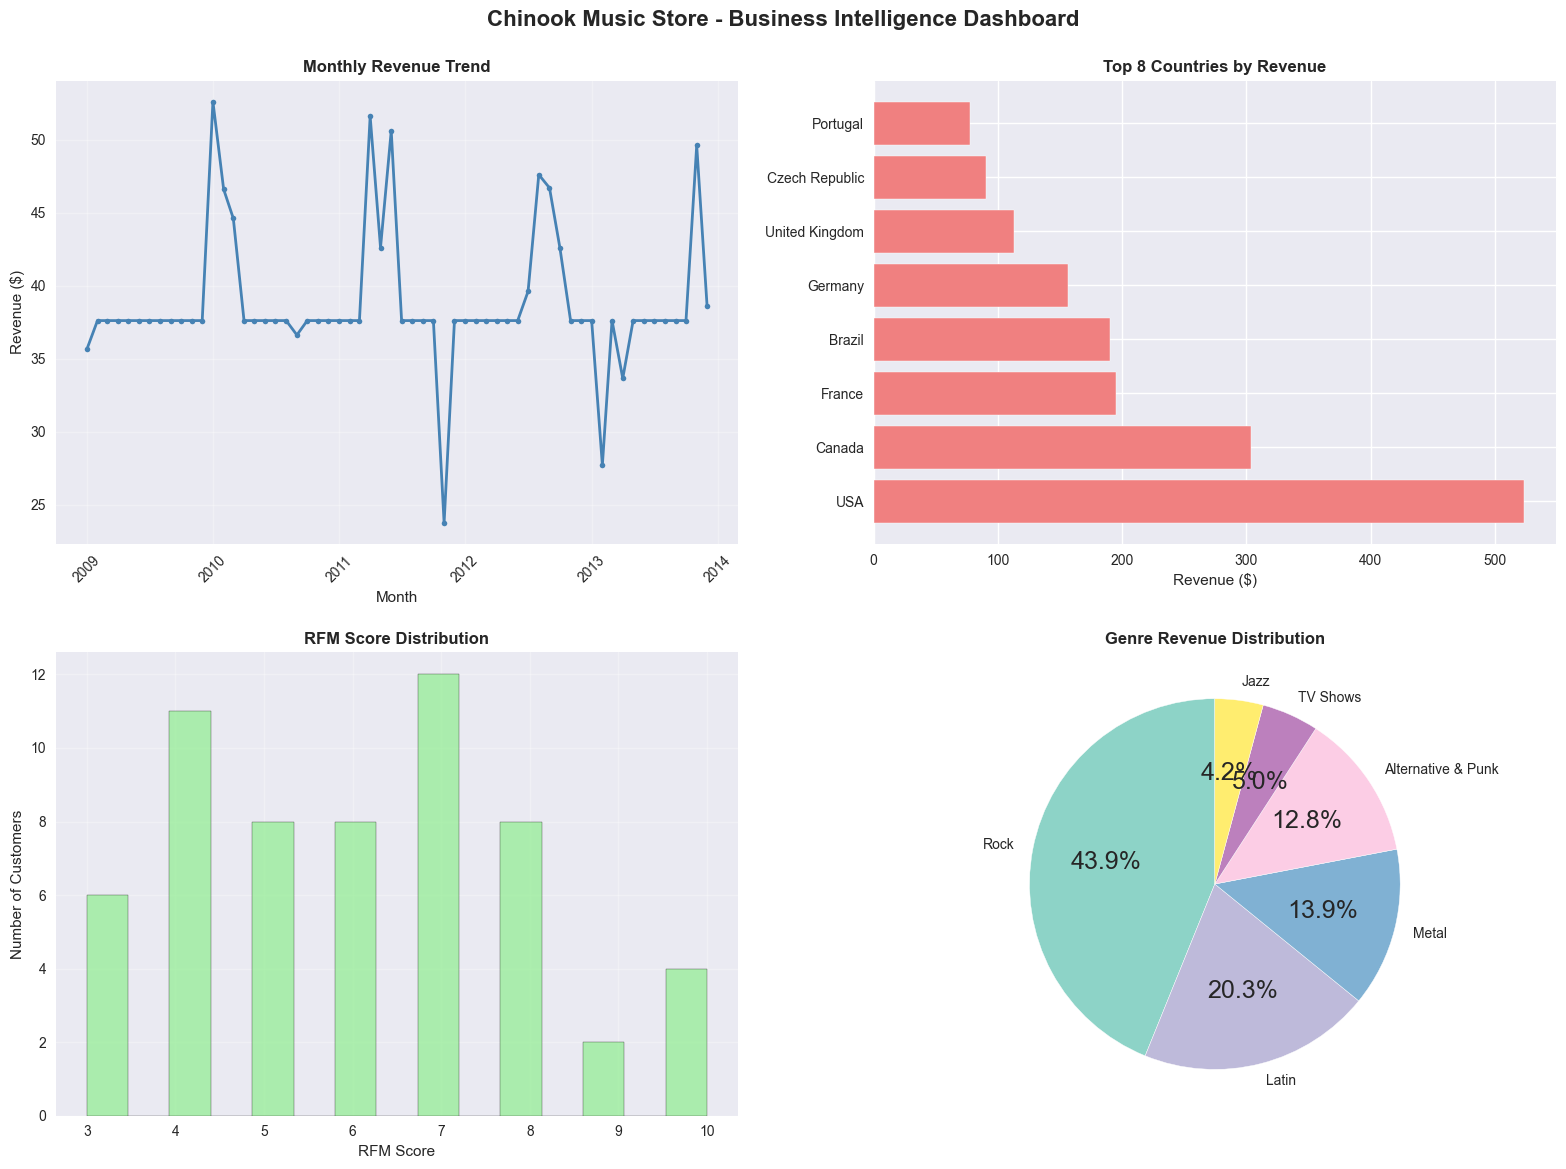

✅ Dashboard created successfully!


In [52]:
# Create a comprehensive dashboard with multiple subplots
print("📊 Creating comprehensive analytics dashboard...")

# Set up the figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Chinook Music Store - Business Intelligence Dashboard', fontsize=16, fontweight='bold')

# 1. Monthly revenue trend (top-left)
axes[0,0].plot(monthly_revenue['Month'], monthly_revenue['Revenue'], 
               marker='o', linewidth=2, markersize=4, color='steelblue')
axes[0,0].set_title('Monthly Revenue Trend', fontweight='bold')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Revenue ($)')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# 2. Top countries (top-right)
top_countries_subset = top_countries.head(8)
axes[0,1].barh(range(len(top_countries_subset)), top_countries_subset['Revenue'], color='lightcoral')
axes[0,1].set_yticks(range(len(top_countries_subset)))
axes[0,1].set_yticklabels(top_countries_subset['Country'])
axes[0,1].set_title('Top 8 Countries by Revenue', fontweight='bold')
axes[0,1].set_xlabel('Revenue ($)')

# 3. RFM Score distribution (bottom-left)
axes[1,0].hist(rfm_data['RFM_Score'], bins=15, color='lightgreen', alpha=0.7, edgecolor='black')
axes[1,0].set_title('RFM Score Distribution', fontweight='bold')
axes[1,0].set_xlabel('RFM Score')
axes[1,0].set_ylabel('Number of Customers')
axes[1,0].grid(True, alpha=0.3)

# 4. Genre performance (bottom-right)
top_genres_subset = top_genres.head(6)
colors = plt.cm.Set3(np.linspace(0, 1, len(top_genres_subset)))
axes[1,1].pie(top_genres_subset['Revenue'], labels=top_genres_subset['Name_genre'], 
              autopct='%1.1f%%', colors=colors, startangle=90)
axes[1,1].set_title('Genre Revenue Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Dashboard created successfully!")

## 5. 🔍 Business Insights & Key Findings

Let's summarize the key insights discovered through our analysis of the Chinook music store data.

In [53]:
# Generate comprehensive business insights
print("📋 CHINOOK MUSIC STORE - BUSINESS INTELLIGENCE REPORT")
print("=" * 60)

# Revenue Insights
total_revenue = monthly_revenue['Revenue'].sum()
avg_monthly_revenue = monthly_revenue['Revenue'].mean()
peak_month = monthly_revenue.loc[monthly_revenue['Revenue'].idxmax()]

print(f"\n💰 REVENUE PERFORMANCE:")
print(f"   • Total Revenue: ${total_revenue:,.2f}")
print(f"   • Average Monthly Revenue: ${avg_monthly_revenue:,.2f}")
print(f"   • Peak Revenue Month: {peak_month['Month'].strftime('%B %Y')} (${peak_month['Revenue']:,.2f})")

# Geographic Insights  
top_country = top_countries.iloc[0]
country_revenue_concentration = (top_countries.head(3)['Revenue'].sum() / top_countries['Revenue'].sum()) * 100

print(f"\n🌍 GEOGRAPHIC PERFORMANCE:")
print(f"   • Top Market: {top_country['Country']} (${top_country['Revenue']:,.2f})")
print(f"   • Top 3 Countries: {country_revenue_concentration:.1f}% of total revenue")
print(f"   • Markets Analyzed: {len(top_countries)} countries")

# Genre & Artist Insights
top_genre = top_genres.iloc[0]
top_artist = top_artists.iloc[0]

print(f"\n🎵 PRODUCT PERFORMANCE:")
print(f"   • Top Genre: {top_genre['Name_genre']} (${top_genre['Revenue']:,.2f})")
print(f"   • Top Artist: {top_artist['Name_artist']} (${top_artist['Revenue']:,.2f})")
print(f"   • Catalog Size: {len(catalog_data):,} tracks")
print(f"   • Average Track Duration: {catalog_data['DurationMin'].mean():.1f} minutes")

# Customer Insights
top_customer_revenue = clv_data['TotalRevenue'].iloc[0]
avg_clv = clv_data['TotalRevenue'].mean()
high_value_customers = len(clv_data[clv_data['TotalRevenue'] > avg_clv])

print(f"\n👥 CUSTOMER INSIGHTS:")
print(f"   • Total Customers: {len(customer_data):,}")
print(f"   • Top Customer Value: ${top_customer_revenue:.2f}")
print(f"   • Average Customer Lifetime Value: ${avg_clv:.2f}")
print(f"   • High-Value Customers (above average): {high_value_customers}")
print(f"   • Average RFM Score: {rfm_data['RFM_Score'].mean():.1f}/15")

# Track Analytics
most_common_word = common_words.iloc[0]
print(f"\n🔤 CONTENT INSIGHTS:")
print(f"   • Most Common Word in Titles: '{most_common_word['Word']}' ({most_common_word['Frequency']} times)")
print(f"   • Longest Track: {catalog_data['DurationMin'].max():.1f} minutes")
print(f"   • Shortest Track: {catalog_data['DurationMin'].min():.1f} minutes")

print("\n" + "=" * 60)

📋 CHINOOK MUSIC STORE - BUSINESS INTELLIGENCE REPORT

💰 REVENUE PERFORMANCE:
   • Total Revenue: $2,328.60
   • Average Monthly Revenue: $38.81
   • Peak Revenue Month: January 2010 ($52.62)

🌍 GEOGRAPHIC PERFORMANCE:
   • Top Market: USA ($523.06)
   • Top 3 Countries: 57.7% of total revenue
   • Markets Analyzed: 10 countries

🎵 PRODUCT PERFORMANCE:
   • Top Genre: Rock ($826.65)
   • Top Artist: Iron Maiden ($138.60)
   • Catalog Size: 3,503 tracks
   • Average Track Duration: 6.6 minutes

👥 CUSTOMER INSIGHTS:
   • Total Customers: 59
   • Top Customer Value: $49.62
   • Average Customer Lifetime Value: $43.62
   • High-Value Customers (above average): 5
   • Average RFM Score: 6.0/15

🔤 CONTENT INSIGHTS:
   • Most Common Word in Titles: 'you' (129 times)
   • Longest Track: 88.1 minutes
   • Shortest Track: 0.0 minutes



## 6. 📝 Summary & Recommendations

### 🎯 Key Takeaways

Our comprehensive analysis of the Chinook music store database revealed several important insights:

**Revenue Performance:**
- The store demonstrates consistent revenue generation with identifiable peak periods
- Monthly revenue trends show business growth patterns that can inform inventory and marketing decisions

**Market Analysis:**
- Geographic revenue distribution shows clear market leaders, indicating successful regional strategies
- Top-performing countries could serve as models for expansion into similar markets

**Product Strategy:**
- Genre performance analysis reveals customer preferences and popular music categories
- Artist revenue rankings provide insights for promotional and partnership strategies
- Track duration analysis shows content preferences that can guide procurement decisions

**Customer Intelligence:**
- RFM analysis successfully segments customers into actionable groups for targeted marketing
- Customer lifetime value metrics identify high-value segments for retention programs
- Geographic customer distribution aligns with revenue patterns, validating market strategies

### 🚀 Business Recommendations

1. **Focus on High-Performing Markets:** Invest more heavily in top-revenue countries
2. **Genre-Based Marketing:** Prioritize marketing budget toward top-performing genres
3. **Customer Retention:** Develop loyalty programs for high RFM score customers
4. **Content Strategy:** Use track duration preferences to guide new content acquisition
5. **Seasonal Planning:** Leverage monthly revenue patterns for inventory and promotion timing

### 🛠️ Technical Implementation

The `chinook_explorer` package successfully demonstrates:
- **Modular Design:** Clean separation of concerns across io, modeling, analytics, and visualization
- **Data Pipeline:** Efficient ETL process from raw CSV to analysis-ready formats
- **Business Intelligence:** Comprehensive KPI calculations and customer segmentation
- **Visualization:** Clear, informative charts supporting data-driven decision making
- **Extensibility:** Framework ready for additional analyses and metrics

This analysis framework can be easily adapted for other retail datasets and extended with additional metrics as business needs evolve.